# MATH 210 Introduction to Mathematical Computing

## March 3, 2017

1. More definite integrals with QUADPACK
2. Numerical differentiation
    * Central difference formula
    * `scipy.misc.derivative`
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. More definite integrals with QUADPACK

### Example: Gamma function

The gamma function $\Gamma(x)$ is extension of the fatorial $n!$ in the sense $\Gamma(n) = (n-1)!$. It's defined by an infinite integral:

$$
\Gamma(x) = \int_0^{\infty} t^{x - 1} e^{-t} dt
$$

Let's use `scipy.integrate.quad` to compute some values of $\Gamma(x)$.

In [2]:
import scipy.integrate as spi

In [3]:
spi.quad?

In [4]:
x = 5
def f(t):
    return t**(x - 1) * np.exp(-t)

# Gamma function for x = 5
I, abserr = spi.quad(f,0,np.inf)
print(I)
print(abserr)

24.0
8.43464142648149e-09


Let's plot the gamma function $\Gamma(x)$ using the function `scipy.special.gamma` and compare it to the values of the factorial given by `scipy.misc.factorial`:

In [5]:
from scipy.misc import factorial

In [6]:
factorial([1,2,3,4,5])

array([   1.,    2.,    6.,   24.,  120.])

In [7]:
from scipy.special import gamma as G

In [8]:
G(5)

24.0

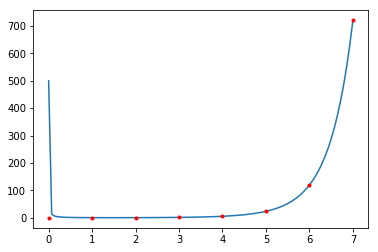

In [9]:
x = np.linspace(0.002,7,100)
y = G(x)

n = np.arange(0,8)
factorials = factorial(n-1)

plt.plot(x,y,n,factorials,'r.');

### Example

Let's verify the integral formula

$$
\int_0^1 \frac{x^{3n} dx}{\sqrt[3]{1 - x^3}} = \frac{2\pi}{3 \sqrt{3}} \frac{\Gamma(n + 1/3)}{\Gamma(1/3) \Gamma(n+1)}
$$

In [10]:
n = 2
def f(x):
    return x**(3*n)/(1 - x**3)**(1/3)

In [11]:
I, abserr = spi.quad(f,0,1)

In [12]:
I

0.26871101692362237

In [13]:
true_I = 2*np.pi/(3*np.sqrt(3)) * G(n + 1/3)/(G(1/3)*G(n + 1))

In [14]:
true_I

0.2687110169235879

Let's verify that the approximation `I` is within `abserr` of the exact value of the integral (ie. the right side of the equation).

In [15]:
np.abs(I - true_I) < abserr

True

## 2. Numerical differentiation

Given a function $f(x)$ we can approximate the value of the derivative $f'(a)$ at $x=a$ by the step-forward formula

$$
f'(a) \approx \frac{f(a + h) - f(a)}{h}
$$

for some (small) choice of $h$. But we can also approximate the value $f'(a)$ at $x=a$ by the step-back formula

$$
f'(a) \approx \frac{f(a) - f(a - h)}{h}
$$

for some (small) choice of $h$. But it's usually best to take the average of these called the **central difference formula**

$$
f'(a) \approx \frac{1}{2} \left( \frac{f(a + h) - f(a)}{h} + \frac{f(a) - f(a - h)}{h} \right) = \frac{f(a + h) - f(a - h)}{2h}
$$


Let's write function called `D` which returns the approximation of $f'(a)$ using the central difference formula.

In [16]:
def D(f,a,h=0.01):
    '''Compute the derivative of f(x) at x=a using the central difference formula with step h.'''
    return (f(a + h) - f(a - h))/(2*h)

In [17]:
def f(x):
    return x**3

In [18]:
D(f,2)

12.000099999999847

Notice that our function can take an array of inputs for $a$ and return the derivatives for each $a$ value. For example, we can plot the derivative of $\sin(x)$:

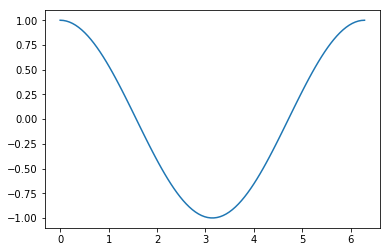

In [19]:
x = np.linspace(0,2*np.pi,100)
y = D(np.sin,x)
plt.plot(x,y)

There's a SciPy function which does the exact same thing as our `D` and it's called `scipy.misc.derivative`.

In [20]:
from scipy.misc import derivative

In [21]:
derivative?

In [22]:
x = np.arange(0,5)
D(np.exp,x,h=0.1)

array([  1.0016675 ,   2.72281456,   7.40137735,  20.11902956,  54.68919246])

In [23]:
derivative(np.exp,x,dx=0.1)

array([  1.0016675 ,   2.72281456,   7.40137735,  20.11902956,  54.68919246])

We see that we get the same result when we use the same value of the step-size $h$ (or $dx$) in each function.

## 3. Exercises

**Exercise 1.** Use `quad` to compute the values $\mathrm{erf}(1)$, \dots, $\mathrm{erf}(5)$ of the [error function](https://en.wikipedia.org/wiki/Error_function)

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} \, dt
$$

**Exercise 2.** Use `derivative` to compute values and then plot the derivative $f'(x)$ of the function

$$
f(x) = \frac{7x^3-5x+1}{2x^4+x^2+1} \ , \ x \in [-5,5]
$$

Compute the derivative of $f(x)$ by hand (using the quotient rule), plot the formula for $f'(x)$ and compare to the numerical approximation above.